In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
mnist = load_digits()

In [6]:
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [7]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [12]:
import pandas as pd
pd.DataFrame(mnist.data).head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [16]:
from sklearn.model_selection import train_test_split
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

In [3]:
fac = 0.99 / 255
train = np.asfarray(train_data[:, 1:]) * fac + 0.01
test = np.asfarray(test_data[:, 1:]) * fac + 0.01

trlab = np.asfarray(train_data[:, :1])
tslab = np.asfarray(test_data[:, :1])


In [17]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(verbose=True)
mlp.fit(X_train, y_train)



Iteration 1, loss = 3.76421770
Iteration 2, loss = 1.89855472
Iteration 3, loss = 1.01045768
Iteration 4, loss = 0.63589960
Iteration 5, loss = 0.44988773
Iteration 6, loss = 0.34936545
Iteration 7, loss = 0.28542395
Iteration 8, loss = 0.23921021
Iteration 9, loss = 0.20554773
Iteration 10, loss = 0.18049654
Iteration 11, loss = 0.15858767
Iteration 12, loss = 0.14256345
Iteration 13, loss = 0.12898573
Iteration 14, loss = 0.11751566
Iteration 15, loss = 0.10676154
Iteration 16, loss = 0.09739046
Iteration 17, loss = 0.08871498
Iteration 18, loss = 0.08356697
Iteration 19, loss = 0.07638591
Iteration 20, loss = 0.07075618
Iteration 21, loss = 0.06304778
Iteration 22, loss = 0.05837327
Iteration 23, loss = 0.05316387
Iteration 24, loss = 0.04943988
Iteration 25, loss = 0.04573680
Iteration 26, loss = 0.04149808
Iteration 27, loss = 0.03888016
Iteration 28, loss = 0.03620474
Iteration 29, loss = 0.03278344
Iteration 30, loss = 0.03061859
Iteration 31, loss = 0.02920716
Iteration 32, los

MLPClassifier(verbose=True)

In [19]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Training set loss: %f" % mlp.loss_)

Training set score: 1.000000
Training set loss: 0.002617


Training set score: 0.928000


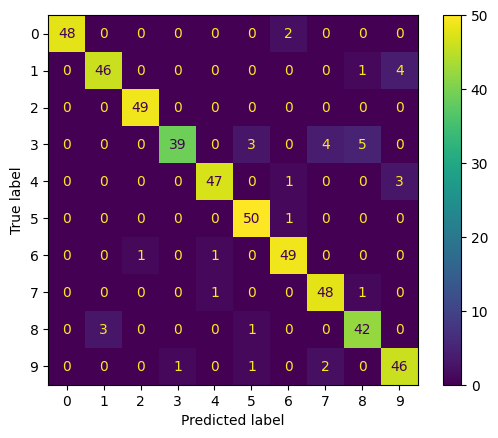

In [29]:
import matplotlib.pyplot as matplot
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

tspred = mlp.predict(X_test)

cm = confusion_matrix(y_test, tspred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

acc = accuracy_score(y_test, tspred) # Test Accuracy
print("Training set score: %f" % acc)

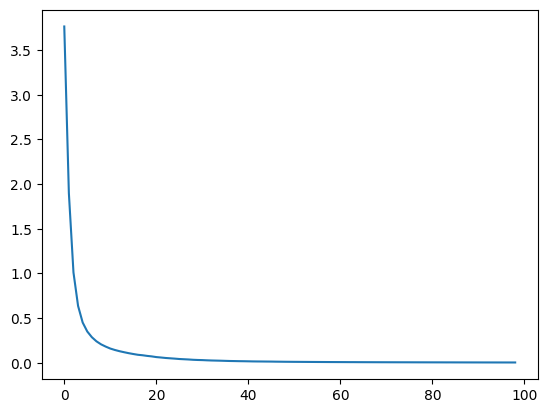

In [28]:
plt.plot(mlp.loss_curve_)